Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

# Strojno učenje

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

# Bilježnica 5: Regresija

(c) 2015 Jan Šnajder

<i>Verzija: 0.3 (2015-11-09)</i>

In [1]:
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Sadržaj:

* Uvod

* Osnovni pojmovi

* Model, funkcija gubitka i optimizacijski postupak

* Postupak najmanjih kvadrata

* Probabilistička interpretacija regresije

* Poopćeni linearan model regresije

* Odabir modela

* Regularizirana regresija

* Sažetak

# Osnovni pojmovi

* Označen skup podataka: $\mathcal{D}=\{(\mathbf{x}^{(i)},y^{(i)})\},\quad \mathbf{x}\in\mathbb{R}^n,\quad y\in\mathbb{R}$


* Hipoteza $h$ aproksimira nepoznatu  funkciju $f:\mathbb{R}^n\to\mathbb{R}$


* Idealno, $y^{(i)}=f(\mathbf{x}^{(i)})$, ali zbog šuma: $$y^{(i)}=f(\mathbf{x}^{(i)})+\varepsilon$$


* $\mathbf{x}$ - **ulazna varijabla** (nezavisna, prediktorska)


* $y$ - **izlazna varijabla** (zavisna, kriterijska)


### Vrste regresije

* Broj **ulaznih** (nezavisnih) varijabli:
  * Univarijatna (jednostavna, jednostruka) regresija: $n=1$
  * Multivarijatna (višestruka, multipla) regresija: $n>1$


* Broj **izlaznih** (zavisnih) varijabli:
  * Jednoizlazna regresija: $f(\mathbf{x}) = y$
  * Višeizlazna regresija: $f(\mathbf{x})=\mathbf{y}$
 

# Model, funkcija gubitka i optimizacijski postupak


### (1) Model

* **Linearan model regresije**: $h$ je linearna funkcija <u>parametara</u>
$\mathbf{w} = (w_0,\dots,w_n)$


* Linearna regresija:
    $$h(\mathbf{x}|\mathbf{w}) = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n$$


* Polinomijalna regresija:
    * Univarijatna polinomijalna: $$h(x|\mathbf{w}) = w_0 + w_1 x + w_2 x^2 + \dots + w_d x^d\quad (n=1)$$
    * Multivarijatna polinomijalna: $$h(\mathbf{x}|\mathbf{w}) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2\quad (n=2, d=2)$$
      * Modelira međuovisnost značajki (*cross-terms* $x_1 x_2, \dots$) 


* Općenite **bazne funkcije**:
    $$h(\mathbf{x}|\mathbf{w}) = w_0 + w_1\phi_1(\mathbf{x}) + \dots + w_m\phi_m(\mathbf{x})$$

### (2) Funkcija gubitka (funkcija pogreške)

* Kvadratni gubitak (engl. *quadratic loss*)

$$
L(y^{(i)},h(\mathbf{x}^{(i)})) = \big(y^{(i)}-h(\mathbf{x}^{(i)})\big)^2
$$

* Funkcija pogreške (proporcionalna s empirijskim očekivanjem gubitka):
$$
E(h|\mathcal{D})=\frac{1}{2}
\sum_{i=1}^N\big(y^{(i)}-h(\mathbf{x}^{(i)})\big)^2
$$

### (3) Optimizacijski postupak

* Postupak **najmanjih kvadrata** (engl. *least squares*)

$$
\mathrm{argmin}_{\mathbf{w}} E(\mathbf{w}|\mathcal{D})
$$


* Rješenje ovog optimizacijskog problema postoji u **zatvorenoj formi**


# Postupak najmanjih kvadrata


* Razmotrimo najprije linearnu regresiju:
$$h(\mathbf{x}|\mathbf{w}) = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n = \sum_{i=1}^n w_i x_i + w_0$$


* Izračun je jednostavniji ako pređemo u matrični račun
  * Svaki vektor primjera $\mathbf{x}^{(i)}$ proširujemo *dummy* značajkom $x^{(i)}_0 = 1$, pa je model onda:

$$h(\mathbf{x}|\mathbf{w}) = \mathbf{w}^\intercal \mathbf{x}$$


* Skup primjera:

$$
\mathbf{X} = 
\begin{pmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 \dots & x^{(1)}_n\\
1 & x^{(2)}_1 & x^{(2)}_2 \dots & x^{(2)}_n\\
\vdots\\
1 & x^{(N)}_1 & x^{(N)}_2 \dots & x^{(N)}_n\\
\end{pmatrix}_{N\times (n+1)}
=
\begin{pmatrix}
1 & (\mathbf{x}^{(1)})^\intercal \\
1 & (\mathbf{x}^{(2)})^\intercal \\
\vdots\\
1 & (\mathbf{x}^{(N)})^\intercal \\
1 & \end{pmatrix}_{N\times (n+1)}
$$
* Matricu primjera $\mathbf{X}$ zovemo **dizajn-matrica**


* Vektor izlaznih vrijednosti:
$$
\mathbf{y} = 
\begin{pmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(N)}\\
\end{pmatrix}_{N\times 1}
$$

### Egzaktno rješenje

* Idealno, tražimo egzaktno rješenje, tj. rješenje za koje vrijedi
$$
(\mathbf{x}^{(i)}, y^{(i)})\in\mathcal{D}.\ h(\mathbf{x}^{(i)}) = y^{(i)}
$$
odnosno
$$
(\mathbf{x}^{(i)}, y^{(i)})\in\mathcal{D}.\ \mathbf{w}^\intercal \mathbf{x} = y^{(i)}
$$


* Možemo napisati kao matričnu jednadžbu ($N$ jednadžbi s $(n+1)$ nepoznanica):

$$
\mathbf{X}\mathbf{w} = \mathbf{y}
$$

$$
\begin{pmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 \dots & x^{(1)}_n\\
1 & x^{(2)}_1 & x^{(2)}_2 \dots & x^{(2)}_n\\
\vdots\\
1 & x^{(N)}_1 & x^{(N)}_2 \dots & x^{(N)}_n\\
\end{pmatrix}
\cdot
\begin{pmatrix}
w_0\\
w_1\\
\vdots\\
w_n\\
\end{pmatrix}
=
\begin{pmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(N)}\\
\end{pmatrix}
$$

* Egzaktno rješenje ovog sustava jednadžbi je

$$
\mathbf{w} = \mathbf{X}^{-1}\mathbf{y}
$$

Međutim, rješenja <u>nema</u> ili ono <u>nije jedinstveno</u> ako:

* (1) $\mathbf{X}$ nije kvadratna, pa nema inverz. U pravilu:
    * $N>(n+1)$ <br>
      $\Rightarrow$ sustav je **preodređen** (engl. *overdetermined*) i nema rješenja
    * $N<(n+1)$ <br>
      $\Rightarrow$ sustav je **pododređen** (engl. *underdetermined*) i ima višestruka rješenja
      
* (2) $\boldsymbol{X}$ jest kvadratna (tj. $N=(n+1)$), ali ipak nema inverz (ovisno o rangu matrice)<br> $\Rightarrow$ sustav je **nekonzistentan**


### Rješenje najmanjih kvadrata


* <u>Približno</u> rješenje sustava $\mathbf{X}\mathbf{w}=\mathbf{y}$


* Funkcija pogreške:    
$$
E(\mathbf{w}|\mathcal{D})=\frac{1}{2}
\sum_{i=1}^N\big(\mathbf{w}^\intercal\mathbf{x}^{(i)} - y^{(i)}\big)^2
$$


* Matrični oblik:
\begin{align*}
E(\mathbf{w}|\mathcal{D}) 
=& 
\frac{1}{2} (\mathbf{X}\mathbf{w} - \mathbf{y})^\intercal (\mathbf{X}\mathbf{w} - \mathbf{y})\\
=&
\frac{1}{2}
(\mathbf{w}^\intercal\mathbf{X}^\intercal\mathbf{X}\mathbf{w} - \mathbf{w}^\intercal\mathbf{X}^\intercal\mathbf{y} - \mathbf{y}^\intercal\mathbf{X}\mathbf{w} + \mathbf{y}^\intercal\mathbf{y})\\
=&
\frac{1}{2}
(\mathbf{w}^\intercal\mathbf{X}^\intercal\mathbf{X}\mathbf{w} - 2\mathbf{y}^\intercal\mathbf{X}\mathbf{w} + \mathbf{y}^\intercal\mathbf{y})
\end{align*}

> Jednakosti linearne algebre:
> * $(A^\intercal)^\intercal = A$
> * $(AB)^\intercal = B^\intercal A^\intercal$

* Minimizacija pogreške:
$$
\begin{align*}
\nabla_{\mathbf{w}}E &= 
\frac{1}{2}\Big(\mathbf{w}^\intercal\big(\mathbf{X}^\intercal\mathbf{X}+(\mathbf{X}^\intercal\mathbf{X})^\intercal\big) -
2\mathbf{y}^\intercal\mathbf{X}\Big) = 
\mathbf{X}^\intercal\mathbf{X}\mathbf{w} - \mathbf{X}^\intercal\mathbf{y} = \mathbf{0}
\end{align*}
$$


> Jednakosti linearne algebre:
> * $\frac{\mathrm{d}}{\mathrm{d}x}x^\intercal A x=x^\intercal(A+A^\intercal)$
> * $\frac{\mathrm{d}}{\mathrm{d}x}A x=A$


* Dobivamo sustav tzv. **normalnih jednadžbi**:
$$
\mathbf{X}^\intercal\mathbf{X}\mathbf{w} = \mathbf{X}^\intercal\mathbf{y}
$$


* Rješenje:
$$
\mathbf{w} = (\mathbf{X}^\intercal\mathbf{X})^{-1}\mathbf{X}^\intercal\mathbf{y} = \color{red}{\mathbf{X}^{+}}\mathbf{y}
$$


* Matrica $\mathbf{X}^{+}=(\mathbf{X}^\intercal\mathbf{X})^{-1}\mathbf{X}^\intercal$ je **pseudoinverz** (Moore-Penroseov inverz) matrice $\mathbf{X}$


* **Q:** Kojih je dimenzija matrica $(\mathbf{X}^\intercal\mathbf{X})^{-1}$?
* **Q:** Što utječe na složenost izračuna inverza matrice: broj primjera $N$ ili broj dimenzija $n$?

# Probabilistička interpretacija regresije

* Ograničimo se BSO na univarijatnu ($n=1$) linearnu regresiju:

$$
h(x|w_0, w_1) = w_0 + w_1 x
$$


* Zbog šuma u $\mathcal{D}$:
$$
    y^{(i)} = f(x^{(i)}) + \color{red}{\varepsilon}
$$

* Prepostavka:
$$
    \color{red}{\varepsilon}\ \sim\ \mathcal{N}(0, \sigma^2)
$$

* Posjedično:
$$
    \color{red}{y|x}\ \sim\        \mathcal{N}\big(f(x), \sigma^2\big)
$$
odnosno
$$
    \color{red}{p(y|x)} = \mathcal{N}\big(f(x), \sigma^2\big)
$$

* Vrijedi 
$$\mathbb{E}[y|x] = \mu = f(x)$$


* Naš cilj je: $h(x|\mathbf{w}) = f(x)$


* [Skica]


* $p(y^{(i)}|x^{(i)})$ je vjerojatnost da je $f(x^{(i)})$ generirala vrijednost $y^{(i)}$
  * (Formulacija nije baš točna, jer je $x$ kontinuirana varijabla a $p$ je gustoća vjerojatnosti.)
  
### Log-izglednost

$$
\begin{align*}
\ln\mathcal{L}(\mathbf{w}|\mathcal{D}) 
&= 
\ln p(\mathcal{D}|\mathbf{w}) = 
\ln\prod_{i=1}^N p(x^{(i)}, y^{(i)}) =
\ln\prod_{i=1}^N p(y^{(i)}|x^{(i)}) p(x^{(i)}) \\ 
&= 
\ln\prod_{i=1}^N p(y^{(i)}|x^{(i)}) + \underbrace{\color{gray}{\ln\prod_{i=1}^N p(x^{(i)})}}_{\text{Ne ovisi o $\mathbf{w}$}} \\
& \Rightarrow \ln\prod_{i=1}^N p(y^{(i)}|x^{(i)}) =
\ln\prod_{i=1}^N\mathcal{N}\big(h(x^{(i)}|\mathbf{w}),\sigma^2\big)\\ &= 
\ln\prod_{i=1}^N\frac{1}{\sqrt{2\pi}\sigma}\exp\Big\{-\frac{\big(y^{(i)}-h(x^{(i)}|\mathbf{w})\big)^2}{2\sigma^2}\Big\}\\ 
&=
\underbrace{\color{gray}{-N\ln(\sqrt{2\pi}\sigma)}}_{\text{konst.}} -
\frac{1}{2\color{gray}{\sigma^2}}\sum_{i=1}^N\big(y^{(i)}-h(x^{(i)}|\mathbf{w})\big)^2\\
& \Rightarrow
-\frac{1}{2}\sum_{i=1}^N\big(y^{(i)}-h(x^{(i)}|\mathbf{w})\big)^2
\end{align*}
$$


* Uz pretpostavku Gaussovog šuma, **maksimizacija izglednosti** odgovara **minimizaciji funkcije pogreške** definirane kao **zbroj kvadratnih odstupanja**:

$$
\begin{align*}
\mathrm{argmax}_{\mathbf{w}} \ln\mathcal{L}(\mathbf{w}|\mathcal{D}) &= \mathrm{argmin}_{\mathbf{w}} E(\mathbf{w}|\mathcal{D})\\
E(h|\mathcal{D}) &=\frac{1}{2} \sum_{i=1}^N\big(y^{(i)}-h(x^{(i)}|\mathbf{w})\big)^2\\
L\big(y,h(x|\mathbf{w})\big)\ &\propto\ \big(y - h(x|\mathbf{w})\big)^2
\end{align*}
$$


* $\Rightarrow$ Probabilističko opravdanje za kvadratnu funkciju gubitka


* Rješenje MLE jednako je rješenju koje daje postupak najmanjih kvadrata!



# Poopćeni linearan model regresije

* Zanima nas poopćenje na $n>1$ koje obuhvaća sve multivarijatne linearne modele regresije: univarijatna regresija, linearna regresija, polinomijalna regresija, ...
  * $h(\mathbf{x}|\mathbf{w}) = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n$
  * $h(x|\mathbf{w}) = w_0 + w_1 x + w_2 x^2 + \dots + w_d x^d$
  * $h(\mathbf{x}|\mathbf{w}) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$
  * ...


* Uvodimo fiksan skup **baznih funkcija** (nelinearne funkcije ulaznih varijabli):
$$
    \{\phi_0, \phi_1, \phi_2, \dots, \phi_m\}
$$    
gdje $\phi_j:\mathbb{R}^n\to\mathbb{R}$


* Dogovorno: $\phi_0(\mathbf{x}) = 1$


* Svaki vektor primjera u $n$-dimenzijskom originalnom ulaznom prostoru (engl. *input space*) $\mathcal{X}$:
$$
\mathbf{x} = (x_1, x_2, \dots, x_n)
$$
preslikavamo u nov, $m$-dimenzijski prostor, tzv. **prostor značajki** (engl. *feature space*):
$$
\boldsymbol{\phi}(\mathbf{x}) = \big(\phi_0(\mathbf{x}), \phi_1(\mathbf{x}), \dots, \phi_m(\mathbf{x})\big)
$$


* **Funkija preslikavanja** (vektor baznih funkcija)
$$
\begin{align*}
\boldsymbol{\phi}&:\mathbb{R}^n\to\mathbb{R}^m:\\
\boldsymbol{\phi}(\mathbf{x}) &= \big(\phi_0(\mathbf{x}),\dots,\phi_m(\mathbf{x})\big)\\
\end{align*}
$$


* Poopćen linearan model:
$$
    h(\mathbf{x}|\mathbf{w}) = \sum_{j=0}^m w_j\phi_j(\mathbf{x}) = \mathbf{w}^\intercal\boldsymbol{\phi}(\mathbf{x})
$$


### Uobičajene funkcije preslikavanja


* Linearna regresija:
$$
\boldsymbol{\phi}(\mathbf{x}) = (1,x_1,x_2,\dots,x_n)
$$


* Univarijatna polinomijalna regresija: 
$$
\boldsymbol{\phi}(x) = (1,x,x^2,\dots,x^m)
$$


* Polinomijalna regresija drugog stupnja: 
$$
\boldsymbol{\phi}(\mathbf{x}) = (1,x_1,x_2,x_1 x_2, x_1^2, x_2^2)
$$


* Gaussove bazne funkcije (RBF):
$$
\phi_j(x) = \exp\Big\{-\frac{(x-\mu_j)^2}{2\sigma^2}\Big\}
$$


* [Skica: RBF] 

### Prostor značajki


* **Funkcija preslikavanja značajki** $\mathbf{\phi} : \mathbb{R}^n \to \mathbb{R}^m $ preslikava primjere iz $n$-dimenzijskog ulaznog prostora u $m$-dimenzijski prostor značajki


* Tipično je $m>n$


* Tada je funkcija koja je linearna u prostoru značajki **nelinearna u ulaznom prostoru**


* Dakle, možemo koristiti linearan model za nelinearne probleme


* Imamo unificiran postupak, neovisno koju funkciju $\boldsymbol{\phi}$ odaberemo

### Primjer: Preslikavanje iz ulaznog prostora u prostor značajki

* $\mathcal{X} = \mathbb{R}$
* $n=1$, $m=3$
* $\boldsymbol{\phi} : \mathbb{R} \to \mathbb{R}^3$
* $\boldsymbol{\phi}(x) = (1,x,x^2)$
* [Skica]

In [261]:
def f(x) : return 3*(x - 2)**2 + 1

x1 = 1
x2 = 2
x3 = 3

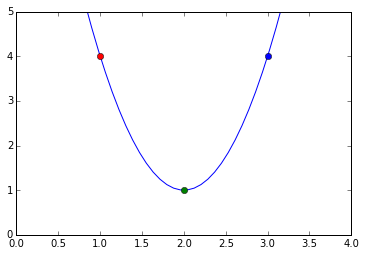

In [262]:
xs = linspace(0, 4)
y = f(xs)
plt.ylim(0,5)
plt.plot(xs, y)
plt.plot(x1, f(x1), 'ro')
plt.plot(x2, f(x2), 'go')
plt.plot(x3, f(x3), 'bo')
plt.show()

In [263]:
def phi(x): return sp.array([1, x, x**2])

In [264]:
phi(x1)

array([1, 1, 1])

In [265]:
phi(x2)

array([1, 2, 4])

In [266]:
phi(x3)

array([1, 3, 9])

In [267]:
xs1 = linspace(0, 5)
xs2 = linspace(0, 10)
X1, X2 = np.meshgrid(xs1, xs2)

In [268]:
phi_X = 3*X2 - 12*X1 + 13

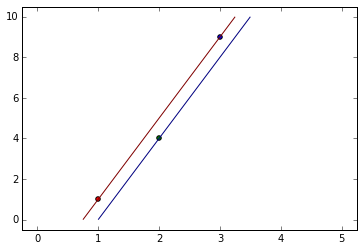

In [286]:
plt.contour(X, Y, phi_X, levels=[1,4])
plt.scatter(phi(x1)[1], phi(x1)[2], c='r')
plt.scatter(phi(x2)[1], phi(x2)[2], c='g')
plt.scatter(phi(x3)[1], phi(x3)[2], c='b')
plt.legend()
plt.show()

### Optimizacijski postupak

* Ništa se ne mijenja u odnosu na ono što smo već izveli, samo umjesto $\mathbf{X}$ imamo dizajn-matricu $\boldsymbol{\Phi}$


* Dizajn-matrica:
$$
\boldsymbol{\Phi} = 
\begin{pmatrix}
1 & \phi_1(\mathbf{x}^{(1)}) & \dots & \phi_m(\mathbf{x}^{(1)})\\
1 & \phi_1(\mathbf{x}^{(2)}) & \dots & \phi_m(\mathbf{x}^{(2)})\\
\vdots\\
1 & \phi_1(\mathbf{x}^{(N)}) & \dots & \phi_m(\mathbf{x}^{(N)})\\
\end{pmatrix}_{N\times m}
=
\begin{pmatrix}
\mathbf{\phi}(\mathbf{x}^{(1)})^\intercal \\
\mathbf{\phi}(\mathbf{x}^{(2)})^\intercal \\
\vdots\\
\mathbf{\phi}(\mathbf{x}^{(N)})^\intercal \\
\end{pmatrix}_{N\times m}
$$

* Prije smo imali:
$$
\mathbf{w} = (\mathbf{X}^\intercal\mathbf{X})^{-1}\mathbf{X}^\intercal\mathbf{y} = \color{red}{\mathbf{X}^{+}}\mathbf{y}
$$
a sada imamo:
$$
\mathbf{w} = (\boldsymbol{\Phi}^\intercal\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^\intercal\mathbf{y} = \color{red}{\boldsymbol{\Phi}^{+}}\mathbf{y}
$$
gdje
$$
\boldsymbol{\Phi}^{+}=(\boldsymbol{\Phi}^\intercal\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^\intercal
$$

# Odabir modela

* Poopćeni linearan model regresije ima jedan **hiperparametar**: funkciju preslikavanje $\boldsymbol{\phi}$


* Alternativno, možemo reći da se radi o dva hiperparametra:
  * izgled baznih funkcija $\phi_j$
  * broj baznih funkcija $m$ (dimenzija prostora značajki)


* Hiperparametre treba namjestiti tako da odgovaraju podatcima, odnosno treba
dobro **odabrati model**


* U suprotnom model može biti **podnaučen** ili **prenaučen**


* Ako model ima mnogo parametra, lako ga je prenaučiti


* Sprečavanje prenaučenosti:
  1. Koristiti više primjera za učenje
  2. Odabrati model unakrsnom provjerom
  3. **Regularizacija**
  4. <span style="color:gray">Bayesovska regresija (bayesovski odabir modela)  $\Rightarrow$ nećemo raditi</span>



# Regularizirana regresija


### Ideja

* Opažanje: kod linearnih modela, što je model složeniji, to ima veće vrijednosti parametara $\mathbf{w}$


* Prenaučeni linearni modeli imaju:
  * ukupno previše parametara (težina) i/ili
  * prevelike vrijednosti pojedinačnih parametara


* Ideja: **ograničiti rast vrijednosti parametara** kažnjavanjem hipoteza s visokim vrijednostima parametara


* Time ostvarujemo **kompromis** između točnosti i jednostavnosti modela i to već **pri samom učenju** modela


* Efektivno se **graničava složenost** modela i sprečava se prenaučenost


* Cilj: što više parametara (težina) pritegnuti na nulu $\Rightarrow$ **rijetki modeli** (engl. *sparse models*)


* Rijetki modeli su:
  * teži za prenaučiti
  * računalno jednostavniji
  * interpretabilniji


### Regularizacija

* U funkciju pogreške (koju minimiziramo) ugrađujemo mjeru složenosti modela:

$$
   E' = \textrm{empirijska pogreška} + \color{red}{\lambda\times\textrm{složenost modela}}
$$

$$
    E'(\mathbf{w}|\mathcal{D}) = E(\mathbf{w}|\mathcal{D}) + \underbrace{\color{red}{\lambda E_R(\mathbf{w})}}_{\text{reg. izraz}}
$$

* $\lambda$ je **regularizacijski faktor**
  * $\lambda=0\ \Rightarrow$ neregularizirana funkcija pogreške
  * Veća vrijednost regularizacijskog faktora $\lambda$ uzrokuje smanjuje efektivne složenost modela


* [Skica: Regularizirana regresija]


* Općenit regularizacijski izraz: **p-norma vektora težina**
$$
    E_R(\mathbf{w}) = \|\mathbf{w}\|_p = \Big(\sum_{j=\color{red}{1}}^m |w_j|^p\Big)^{\frac{1}{p}}
$$


* L2-norma ($p=2$):
$$\|\mathbf{w}\|_2 = \sqrt{\sum_{j=\color{red}{1}}^m w_j^2} = \sqrt{\mathbf{w}^\intercal\mathbf{w}}$$


* L1-norma ($p=1$):
$$\|\mathbf{w}\|_1 = \sum_{j=\color{red}{1}}^m |w_j|$$


* L0-norma ($p=0$):
$$\|\mathbf{w}\|_0 = \sum_{j=\color{red}{1}}^m \mathbf{1}\{w_j\neq 0\}$$


* **NB:** Težina $w_0$ se ne regularizira
  * **Q:** Zašto?
  
  






### Regularizirani linearni model regresije
 
* **L2-regularizacija** ili Tikhononova regularizacija $\Rightarrow$ **Ridge regression**:
$$
E(\mathbf{w}|\mathcal{D})=\frac{1}{2}
\sum_{i=1}^N\big(\mathbf{w}^\intercal\boldsymbol{\phi}(\mathbf{x}^{(i)}) - y^{(i)}\big)^2
+ \color{red}{\frac{\lambda}{2}\|\mathbf{w}\|^2_2}
$$
  * ima rješenje u zatvorenoj formi
  

* **L1-regularizacija** $\Rightarrow$ **LASSO regularization** (engl. *least absolute shrinkage and selection operator*)
$$
E(\mathbf{w}|\mathcal{D})=\frac{1}{2}
\sum_{i=1}^N\big(\mathbf{w}^\intercal\boldsymbol{\phi}(\mathbf{x}^{(i)}) - y^{(i)}\big)^2
+ \color{red}{\frac{\lambda}{2}\|\mathbf{w}\|_1}
$$
  * nema rješenje u zatvorenoj formi!


* **L0-regularizacija**
$$
E(\mathbf{w}|\mathcal{D})=\frac{1}{2}
\sum_{i=1}^N\big(\mathbf{w}^\intercal\mathbf{\phi}(\mathbf{x}^{(i)}) - y^{(i)}\big)^2
+ \color{red}{\frac{\lambda}{2}\sum_{j=1}^m\mathbf{1}\{w_j\neq0\}}
$$
  * NP-potpun problem!


### L2-regularizacija

* Linearna regresija sa L2-regularizacijom ima rješenje u zatvorenoj formi:

$$
\begin{align*}
E'(\mathbf{w}|\mathcal{D}) &= \frac{1}{2}
(\boldsymbol{\Phi}\mathbf{w} - \mathbf{y})^\intercal
(\boldsymbol{\Phi}\mathbf{w} - \mathbf{y}) + \color{red}{\frac{\lambda}{2}\mathbf{w}^\intercal\mathbf{w}}\\
&=
\frac{1}{2}
(\mathbf{w}^\intercal\boldsymbol{\Phi}^\intercal\boldsymbol{\Phi}\mathbf{w} - 2\mathbf{y}^\intercal\boldsymbol{\Phi}\mathbf{w} + \mathbf{y}^\intercal\mathbf{y}
+ \color{red}{\lambda\mathbf{w}^\intercal\mathbf{w}})\\
\nabla_{\mathbf{w}}E' &= 
\boldsymbol{\Phi}^\intercal\boldsymbol{\Phi}\mathbf{w} - \boldsymbol{\Phi}^\intercal\mathbf{y} + \color{red}{\lambda\mathbf{w}} \\
&=
(\boldsymbol{\Phi}^\intercal\boldsymbol{\Phi} + \color{red}{\lambda\mathbf{I}})\mathbf{w} - \boldsymbol{\Phi}^\intercal\mathbf{y} = 0 \\
\mathbf{w} &= (\boldsymbol{\Phi}^\intercal\boldsymbol{\Phi} + \color{red}{\lambda\mathbf{I}})^{-1}\boldsymbol{\Phi}^\intercal\mathbf{y}\\
\end{align*}
$$

### Napomene

* Iznos parametra $w_j$ odgovara važnosti značajke, a predznak upućuje na njezin utjecaj (pozitivan ili negativan) na izlaznu vrijednost


* Regularizacija smanjuje složenost modela na način da prigušuje vrijednosti pojedinih značajki, odnosno efektivno ih izbacuje (kada $w_j\to0$)
  * Ako je model nelinearan, to znači smanjivanje nelinearnosti
  
  
* Težinu $w_0$ treba izuzeti iz regularizacijskog izraza (jer ona definira pomak) ili treba centrirati podatke tako da $\overline{y}=0$, jer onda $w_0\to0$


* L2-regularizacija kažnjava težine proporcionalno njihovom iznosu (velike težine više, a manje težine manje) Teško će parametri biti pritegnuti baš na nulu. Zato **L2-regularizacija ne rezultira rijetkim modelima**


* L1-regularizirana regresija rezultira rijetkim modelima, ali nema rješenja u zatvorenoj formi (međutim mogu se koristiti iterativni optimizacijski postupci


* Regularizacija je korisna kod modela s puno parametara, jer je takve modele lako prenaučiti


* Regularizacija smanjuje mogućnost prenaučenosti, ali ostaje problem odabira hiperparametra $\lambda$
  * Taj se odabir najčešće radi **unakrsnom provjerom**
    
    
* **Q:** Koju optimalnu vrijednost za $\lambda$ bismo dobili kada bismo optimizaciju radili na skupu za učenje?


# Sažetak


* **Linearan model regresije** linearan je u parametrima


* Parametri linearnog modela uz kvadratnu funkciju gubitka imaju rješenje u zatvorenoj formi u obliku **pseudoinverza dizajn-matrice**


* Nelinearnost regresijske funkcije ostvaruje se uporabom nelinearnih **baznih funkcija** (preslikavanjem ulaznog prostora u prostor značajki


* Uz pretpostavku normalno distribuiranog šuma, **MLE je istovjetan postupku najmanjih kvadrata**, što daje probabilističko opravdanje za uporabu kvadratne funkcije gubitka


* **Regularizacija smanjuje prenaučenost** ugradnjom dodatnog izraza u funkciju pogreške kojim se kažnjava složenost modela
